In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [117]:
data = pd.read_csv("../datasets/AdmisionUes.csv")

<Axes: ylabel='paes'>

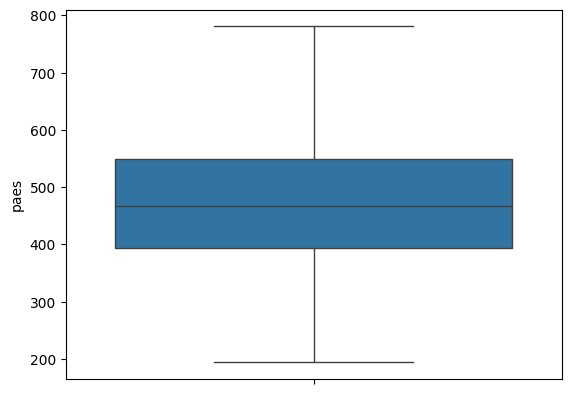

In [118]:
sns.boxplot(data, y="paes", showfliers=False)

<Axes: xlabel='paes', ylabel='Count'>

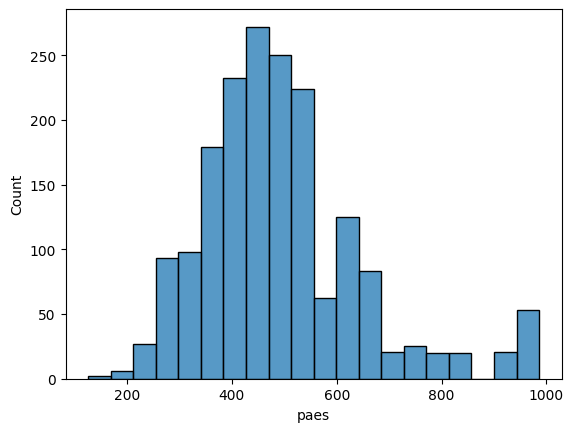

In [119]:
sns.histplot(data, x="paes", bins=20)

<Axes: xlabel='admit', ylabel='count'>

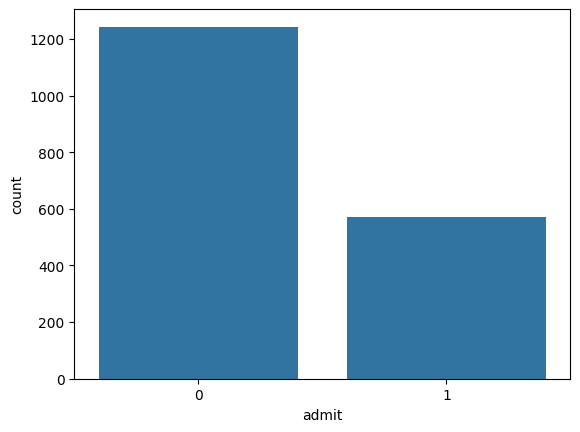

In [120]:
sns.countplot(data, x="admit")

<Axes: ylabel='nem'>

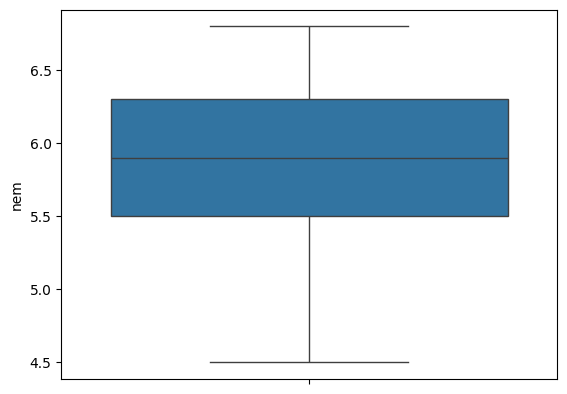

In [121]:
sns.boxplot(data, y="nem")

<Axes: xlabel='nem', ylabel='Count'>

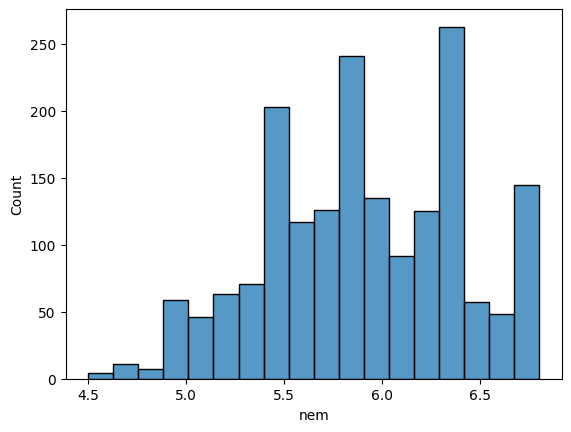

In [122]:
sns.histplot(data, x="nem")

<Axes: ylabel='nem'>

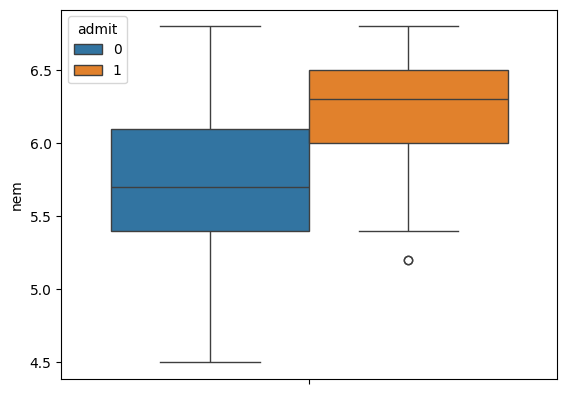

In [123]:
sns.boxplot(data, y="nem", hue="admit")

<Axes: ylabel='paes'>

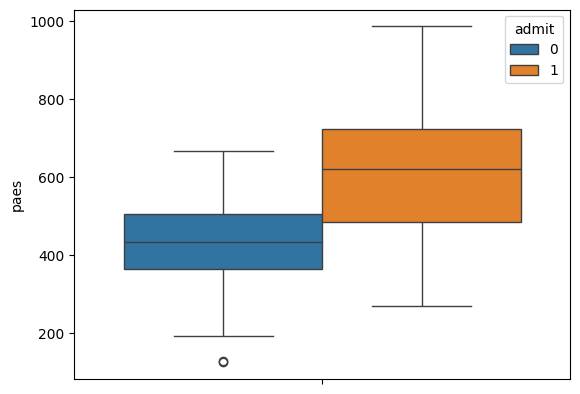

In [124]:
sns.boxplot(data, y="paes", hue="admit")

<Axes: xlabel='nem', ylabel='Count'>

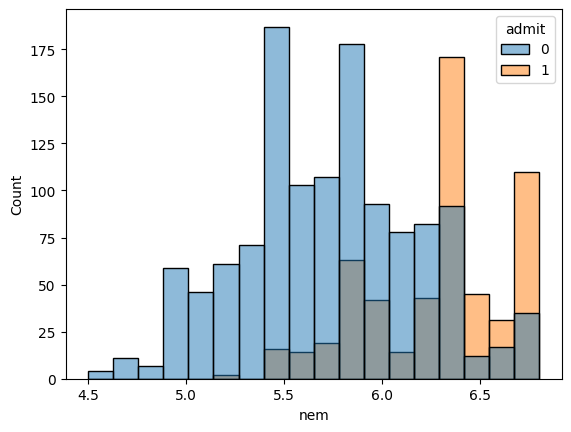

In [125]:
sns.histplot(data, x="nem", hue="admit")

<Axes: xlabel='paes', ylabel='Count'>

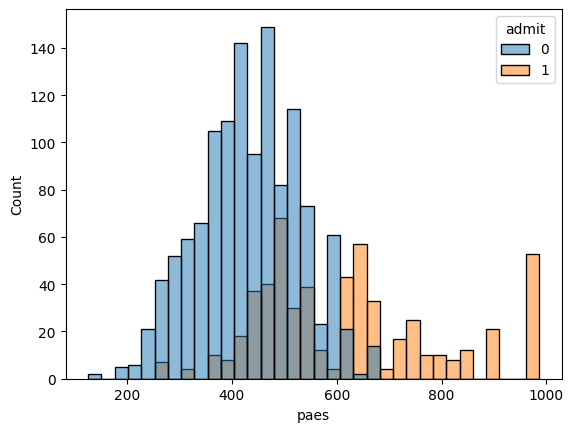

In [126]:
sns.histplot(data, x="paes", hue="admit")

# Model

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                              f1_score, roc_auc_score, confusion_matrix)
from sklearn.model_selection import train_test_split

In [128]:
X = data[["nem", "paes"]]
y = data["admit"]
X.shape, y.shape

((1813, 2), (1813,))

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1359, 2), (454, 2), (1359,), (454,))

In [130]:
lr = LogisticRegression()
lr

LogisticRegression()

In [131]:
lr.fit(X_train, y_train)

LogisticRegression()

In [132]:
print("Accuracy", lr.score(X_train, y_train)) #Accuracy

Accuracy 0.8153053715967623


In [133]:
print("Accuracy", lr.score(X_test, y_test)) #Accuracy test

Accuracy 0.8193832599118943


# Metrics

In [134]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
y_prob = y_prob[:,1]

In [135]:
confusion_matrix(y_test, y_pred)

array([[297,  33],
       [ 49,  75]])

In [136]:
accuracy_score(y_test, y_pred)

0.8193832599118943

In [137]:
precision_score(y_test, y_pred)

0.6944444444444444

In [138]:
recall_score(y_test, y_pred)

0.6048387096774194

In [139]:
f1_score(y_test, y_pred)

0.646551724137931

In [140]:
roc_auc_score(y_test, y_prob)

np.float64(0.868939393939394)

# Additional plots

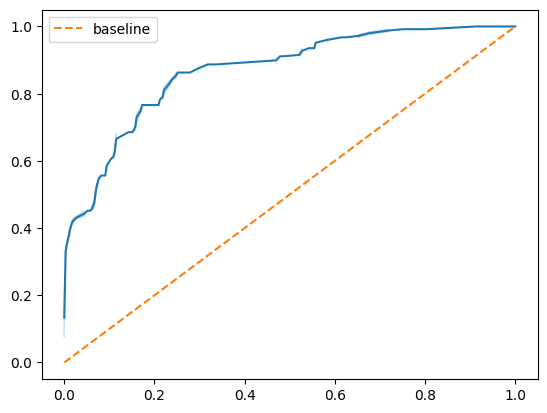

In [141]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_prob)
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1], [0,1], linestyle="--", label="baseline")
plt.legend()
plt.show()